Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 0.74
R-squared (R^2): 0.29


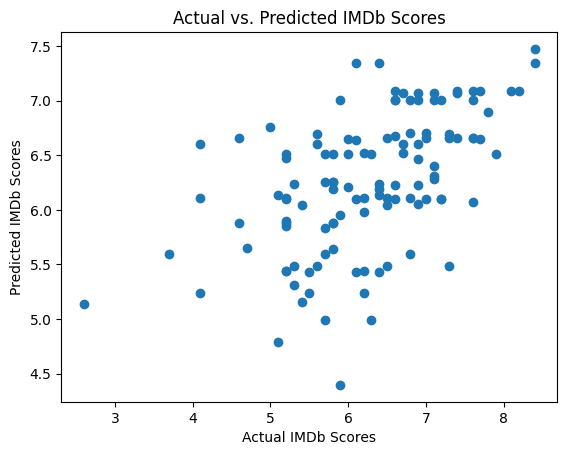

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']

for encoding in encodings_to_try:
    try:
        data = pd.read_csv('NetflixOriginals.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue


data['IMDB Score'] = data['IMDB Score'].fillna(data['IMDB Score'].mean())


genres = data['Genre'].str.get_dummies(',')
data = pd.concat([data, genres], axis=1)


data['Premiere'] = pd.to_datetime(data['Premiere'])
data['PremiereYear'] = data['Premiere'].dt.year


data = data.drop(['Title', 'Genre', 'Premiere', 'Runtime', 'Language'], axis=1)



X = data.drop(['IMDB Score'], axis=1)
y = data['IMDB Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


plt.scatter(y_test, y_pred)
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("Actual vs. Predicted IMDb Scores")
plt.show()
